In [1]:
#Import all libraries
import pandas as pd
from datetime import datetime
from datetime import timedelta 
from datetime import date
import time
import urllib
import matplotlib.pyplot as plt
import numpy as np
import pyodbc 
import sqlalchemy
import pymysql
from decimal import Decimal

In [2]:
# Use read_CSV() to extract data from John Hopkins GITHUB
today = date.today()
yesterday = today - timedelta(days=1)
date_Converted = yesterday.strftime("%m-%d-%Y")
try:
    url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/" + date_Converted + ".csv"
    df = pd.read_csv(url)
except urllib.error.HTTPError:
    f = open("C:\\Users\\JosephGaiennie\\Desktop\\Python\\Corona_Logs.txt", "a")
    f.write("str(time.time())" +  " " + "HTTPError")
    f.close()
df = df.fillna(0)


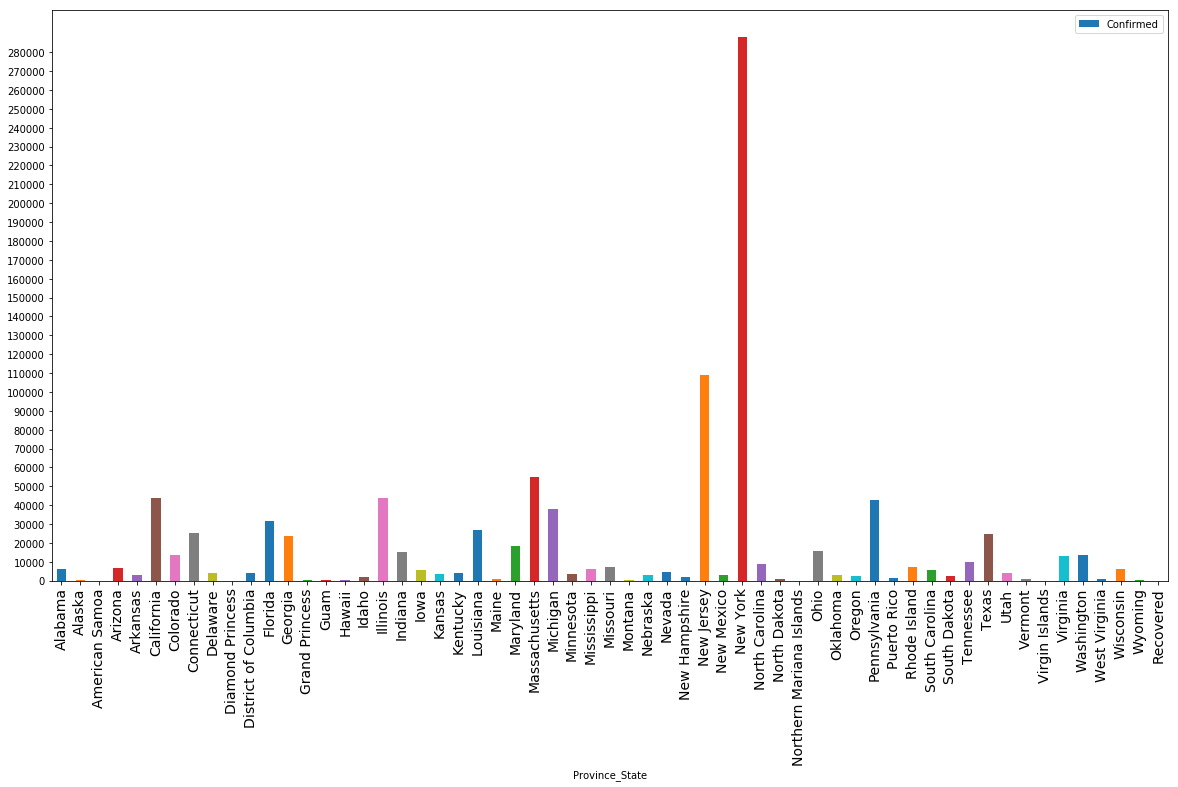

In [5]:
# graph the 
df.plot(kind='bar',x='Province_State',y='Confirmed')
fig = plt.gcf()
fig.set_size_inches(20, 10.5)
plt.xticks(fontsize=14)
y = [min(df["Confirmed"]),max(df["Confirmed"])]
plt.yticks(np.arange(y[0], y[1], 10000))
plt.savefig("C:\\Users\\JosephGaiennie\\Desktop\\Python\\CoronaVirusPics\\USCoronaVirus" + date_Converted + ".png")

In [6]:
conn = pyodbc.connect('Driver={SQL Server Native Client 11.0};'
                      'Server=LAPTOP-D3KCPF8R;'
                      'Database=Practice_DB;'
                      'Trusted_Connection=yes;')
cursor = conn.cursor()


In [7]:
for index, row in df.iterrows():
    cursor.execute(
        """INSERT INTO [dbo].[COVID19_Analysis] ([State]
           ,[Date]
           ,[Deaths]
           ,[Recovered]
           ,[Incident_Rate]
           ,[People_Tested]
           ,[People_Hospitilized]
           ,[Moralitiy_Rate]
           ,[Confirmed]) VALUES(?,?,?,?,?,?,?,?,?)
           """,
                   (row['Province_State'],date_Converted,row['Deaths'],row['Recovered'],(row['Incident_Rate']),row['People_Tested'],int(row['People_Hospitalized']),row['Mortality_Rate'],row['Confirmed']))
    conn.commit()


Alabama 04-26-2020 219 0.0
Alaska 04-26-2020 9 217.0
American Samoa 04-26-2020 0 0.0
Arizona 04-26-2020 275 1383.0
Arkansas 04-26-2020 51 985.0
California 04-26-2020 1725 0.0
Colorado 04-26-2020 688 2150.0
Connecticut 04-26-2020 1924 0.0
Delaware 04-26-2020 120 911.0
Diamond Princess 04-26-2020 0 0.0
District of Columbia 04-26-2020 178 657.0
Florida 04-26-2020 1075 0.0
Georgia 04-26-2020 916 0.0
Grand Princess 04-26-2020 3 0.0
Guam 04-26-2020 5 128.0
Hawaii 04-26-2020 14 482.0
Idaho 04-26-2020 56 938.0
Illinois 04-26-2020 1933 0.0
Indiana 04-26-2020 813 0.0
Iowa 04-26-2020 118 1900.0
Kansas 04-26-2020 121 0.0
Kentucky 04-26-2020 208 1501.0
Louisiana 04-26-2020 1729 14927.0
Maine 04-26-2020 50 532.0
Maryland 04-26-2020 910 1177.0
Massachusetts 04-26-2020 2899 0.0
Michigan 04-26-2020 3315 8342.0
Minnesota 04-26-2020 272 1774.0
Mississippi 04-26-2020 227 0.0
Missouri 04-26-2020 283 0.0
Montana 04-26-2020 14 339.0
Nebraska 04-26-2020 56 0.0
Nevada 04-26-2020 206 0.0
New Hampshire 04-26-202

In [26]:
conn.close()